In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [23]:
import numpy as np
class Bandit:
    def __init__(self, k, initial_q=0, c=0, random_state=42):
        np.random.seed(random_state)
        self.k = k
        self.q_true = np.random.normal(0, 1, k)  # True mean rewards for each arm / hidden true mean
        self.n = np.zeros(k)  # Number of times each arm is pulled
        self.q_est = np.zeros(k) + initial_q # Estimated values of each arm 
        self.c = c

    def pull(self, arm_id, random_state=42):
        """Pulls an arm and returns a reward sampled from its true distribution"""
        np.random.seed(random_state)
        return np.random.normal(self.q_true[arm_id], 1)

    def select_action(self, epsilon=0, t=0, random_state=42):
        np.random.seed(random_state)
        argmax = np.argmax(self.q_est + self.c*np.sqrt(np.log(t+1)/(self.n + 1)))
        return argmax if np.random.rand() >= epsilon else np.random.randint(self.k)

    def update(self, arm_id, reward):
        self.n[arm_id] += 1
        self.q_est[arm_id] = self.q_est[arm_id] + (1/self.n[arm_id])*(reward - self.q_est[arm_id])

    def plot_q_true(self, random_state=42):
        np.random.seed(random_state)
        df = pd.DataFrame()
        for i in range(self.k):
            df[i] = np.random.normal(self.q_true[i], size=1000000)
        df = df.melt()
        sns.violinplot(x=df['variable'], y=df['value'])

In [32]:
def run_bandit(k=10, N=1000, epsilon=0.1, initial_q=0, c=0):
    all_runs = []
    est = []
    for i in range(30):
        rewards = []
        avg_rewards = []
        b = Bandit(k=k, initial_q=initial_q, c=c, random_state=42)
        for t in range(N):
            arm = b.select_action(epsilon, t=t, random_state=42+i+t)
            reward = b.pull(arm, random_state=42+i+t)
            b.update(arm, reward)
            rewards.append(reward)
            avg_rewards.append(np.mean(rewards))
        all_runs.append(avg_rewards)
        est.append(b.q_est)
        # print(avg_rewards[:10])
        # input()
        
    # print(b.q_est)
    return np.mean(all_runs, axis=0), np.mean(est, axis=0)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337])

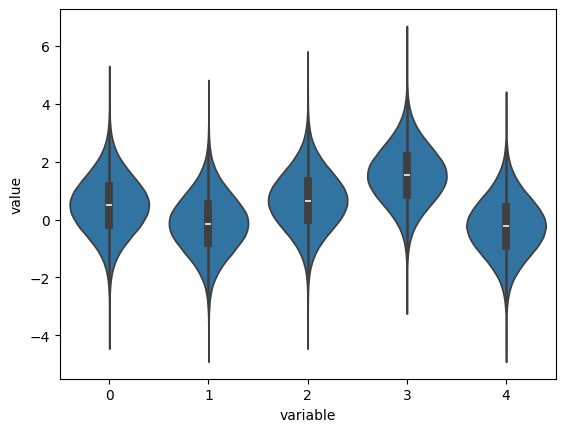

In [33]:
k = 5
N=3000
b=Bandit(k)
opt = max(b.q_true)
b.plot_q_true()
b.q_true

[-0.2927385  -0.64524067 -0.04098379  0.90498417 -0.09455018]
[ 0.42609709 -0.10890971  0.32544378  1.51839371  0.51834705]
[ 0.50197195 -0.06559382  0.57559491  1.51368111 -0.17597932]
[-0.10780371 -0.59020373  0.0931697   1.38373911 -0.63525264]
[-0.2927385  -0.64524067 -0.04098379  0.90498417 -0.09455018]


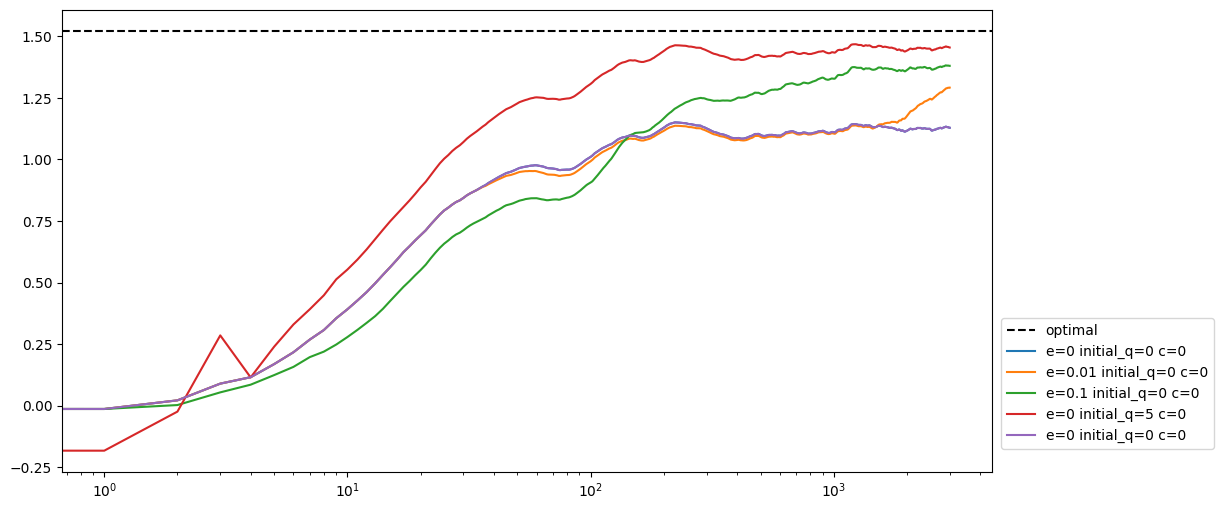

In [34]:
plt.figure(figsize=(12, 6))
plt.axhline(opt, label="optimal", ls="--", c="black")

for e, initial_q, c in [
    [0, 0, 0],
    [0.01, 0, 0],
    [0.1, 0, 0],
    [0, 5, 0],
      [0, 0, 0],
    # [0, 0, 1],
    # [0, 0, 2],
    # [0, 0, 4],
    # [0, 0, 8],
    # [0, 0, 16],
    # [0.01, 5, 1]
    
]:
    avg_r, est = run_bandit(k=k, N=N, initial_q=initial_q, epsilon=e, c=c)
    plt.plot(avg_r, label=f"e={e} initial_q={initial_q} c={c}")
    print(est)
plt.legend(loc=(1.01, .05))
plt.xscale('log')
plt.show()